<a href="https://colab.research.google.com/github/nak650228/GFPGAN_video_restoration/blob/main/YOLOv4_Training_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv4物体検出器をDarknetで動作させる! (GPU 有効版)
このチュートリアルでは、YOLOv4をGPU対応のGoogle Colab上で構築し、ミリ秒単位で物体検出を実行できるようにします。

# ステップ2： darknetのクローンとビルド
以下のセルでは、AlexeyABのリポジトリからdarknetをクローンし、Makefileを修正した後、darknet用のOPENCVとGPUを有効にし、その後darknetをビルドします。

make実行時のワーニングは気にしないでください。

In [1]:
from IPython.display import clear_output
import os

In [2]:
# darknetのレポジトリをクローンする
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.69 MiB | 21.57 MiB/s, done.
Resolving deltas: 100% (10404/10404), done.


In [3]:
# GPUとOPENCVを有効にするためにmakefileを変更する。
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [4]:
# CUDAを確認する
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [8]:
# make darknet（ダークネットを構築し、ダークネットの実行ファイルを使ってオブジェクト検出器の実行やトレーニングができるようにする）
!make
clear_output()

# ステップ3： 学習済みのYOLOv4の重みをダウンロード
YOLOv4は、予測可能な80のクラスを持つcocoデータセットですでにトレーニングされています。この事前学習済みの重みを取得することで、事前学習済みのクラスでYOLOv4を実行し、検出結果を得ることができます。

In [6]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
clear_output()

# ステップ4： ヘルパー関数の定義

これら3つの関数は、認識を実行した後にColab Notebookに画像を表示したり、画像のアップロードやダウンロードを行うためのヘルパー関数です。

In [7]:
#@title ヘルパー関数の定義

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      os.rename(name,'/content/image.jpg')
      print ('saved file', name)


# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [12]:
#@title ステップ5： アップロードヘルパー機能を使ってみてください。
%cd ..
upload()
%cd darknet

/content


Saving kaori2.jpg to kaori2.jpg
saved file kaori2.jpg
/content/darknet


In [15]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [16]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'2018-11-23_Gitハンズオン Lv1: Gitツール不要のGitHub操作 (茅場町).gslides'
 Colab-ESRGAN
'Colab Notebooks'
 DAIN
 DFDNet
'Image Enhancer'
 images
 IMG_20210827_152508.jpg
 IMG_20210827_152511.jpg
 IMG_20210827_152514.jpg
 IMG_20210827_152517.jpg
 IMG_20210827_152521.jpg
 IMG_20210827_152523.jpg
 IMG_20210827_152525.jpg
 IMG_20210827_152526.jpg
 JIS_Q27002.txt
 Movie
 MovieBeautifier
'MovieBeautifier_v2.ipynb のコピー'
 oba2.png
 oba3.png
 OpenCV.ipynb
 ots_train_ffa_3_19.pk
'output (7).mp4'
 Untitled0.ipynb
 Untitled1.ipynb
'VID_20210823_183121 (1).mp4'
 VID_20210823_183121.mp4
 Youtube_downloader.py


In [17]:
# cd back into the darknet folder to run detections
%cd darknet

/content/darknet


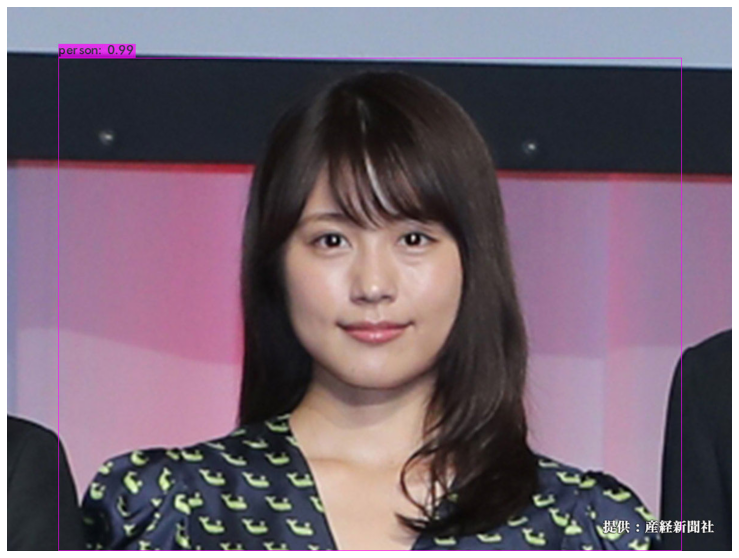

In [20]:
# run detections on image within your Google Drive!
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights /mydrive/images/image.jpg
clear_output()
imShow('predictions.jpg')

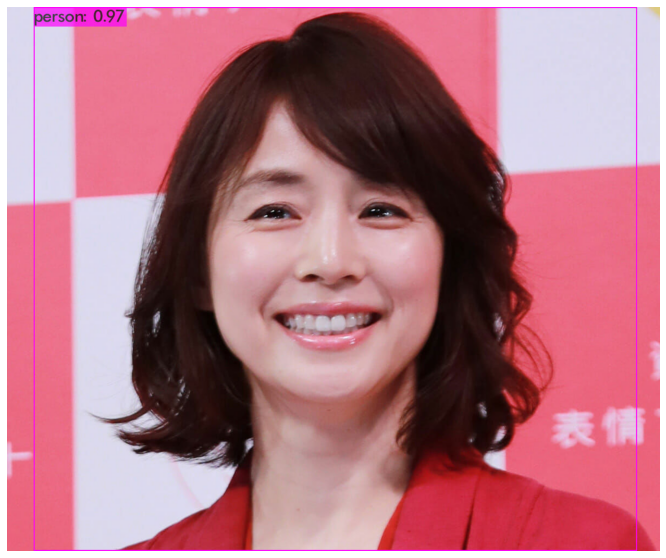

In [14]:
# ヘルパー関数を使って画像を表示
imShow('predictions.jpg')

In [10]:
# Colabで「すべてを実行」した場合、このセルでエラーを起こして停止させます。
assert False

AssertionError: ignored

# Step 8: Customize YOLOv4 with the different command line flags.
Darknet and YOLOv4 have a lot of command line flags you can add to your '!./darknet detector ...' to allow it to be customizeable and flexible.

I will show a few examples of these flags that you can take advantage of! Feel free to mix and match them together to customize your detections in any way you want.

## Threshold Flag
There is a flag '-thresh' you can use to add a threshold for confidences on the detections.  Only detections with a confidence level above the threshold you set will be returned.

In the example below we run darknet with YOLOv4 without a threshold on the test image dog.jpg. The image returns four detections, the lowest confidence being on the pottedplant with 33%.

If we add the '-thresh 0.5' flag this will only output three detections as now pottedplant falls below the threshold and is ignored. 

Check it out below!

In [ ]:
# this is ran without the threshold flag set
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/dog.jpg
imShow('predictions.jpg')

In [ ]:
# same detections but ran with the threshold flag set to 0.5 (pottedplant is no longer detected!)
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/dog.jpg -thresh 0.5
imShow('predictions.jpg')

## Output Bounding Box Coordinates
You can output bounding box coordinates for each detection with the flag '-ext_output'. This external outputs flag will give you a few extra details about each detection within an image.

Check it out below!

In [ ]:
# darknet run with external output flag to print bounding box coordinates
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg -ext_output
imShow('predictions.jpg')

## Don't Show Image
You can add the flag '-dont_show' to not have the image outputted after running darknet. This doesn't really affect anything when running in Colab as the image is unable to output properly straight from darknet anyways. However, by adding the -dont_show flag you will get rid of the following warning from showing.
```
Unable to init server: Could not connect: Connection refused

(predictions:1850): Gtk-WARNING **: 17:01:00.687: cannot open display:
```

This is an important flag to have when running darknet with YOLOv4 on video as it will suppress having the video shown.

In [ ]:
# running darknet with dont show flag set (no longer get warnings)
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg -dont_show

# Step 9: Multiple Images at Once
YOLOv4 object detections can be run on multiple images at once. This is done through having a text file which has the paths to several images that you want to have the detector run on.

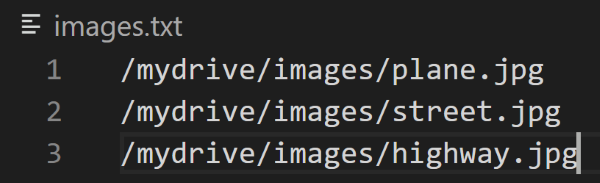

The .txt file should be in this format. One path to an image per line.

This file is stored to my Google Drive root directory and holds the path to three images within my Google Drive images folder.




## Save Results to .JSON File
Here is an example of saving the multiple image detections to a .JSON file.

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -ext_output -dont_show -out result.json < /mydrive/images.txt

In [ ]:
download('result.json')

## Saving Results to a .txt File
You can also save the results of running multiple images to a text file.

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show -ext_output < /mydrive/images.txt > result.txt

In [ ]:
download('result.txt')

# 自分だけのYOLOv4物体検出器を作る方法
いよいよ、YOLOv4のカスタムオブジェクト検出器を作って、好きなクラスやオブジェクトを認識させます。

この作業にはいくつかのコツがありますので、このチュートリアルの残りの部分をよく理解しておいてください。

カスタムYOLOv4検出器を作るためには、以下のものが必要です。

* ラベル付きカスタムデータセット
* カスタム.cfgファイル
* obj.dataおよびobj.namesファイル
* train.txtファイル（test.txtはオプションです)。

# ステップ1：カスタムデータセットの収集とラベル付け
カスタムオブジェクト検出器を作成するためには、検出器が効率的にオブジェクトを検出できるように訓練するための、画像とラベルのデータセットが必要です。

これには2つの方法があります。1つは、Google ImagesImagesを利用する方法、もう1つは、独自のデータセットを作成し、アノテーションツールを使って手動でラベルを付ける方法です。**（私は最初の方法をお勧めします！）**。

### 方法1：GoogleのOpen Images Datasetを使う（推奨）
この方法は、何千枚もの画像を集めて、数分でラベルを自動生成できるので、お勧めの方法です GoogleのOpen Images Datasetからデータセットを収集し、OIDv4 toolkitを使ってラベルを生成するのは、簡単で時間の節約にもなります。このデータセットには600以上のクラスのラベル付き画像が含まれています。[Explore the Dataset Here!](https://storage.googleapis.com/openimages/web/index.html)

この方法を使って自分のカスタムデータセットを作成する方法については、私の過去のyoutubeビデオをご覧ください。

[Creating a Custom YOLOv3 Dataset (Video)](https://www.youtube.com/watch?v=_4A9inxGqRM) **(images and labels are same format for YOLOv4 so video still works)**

OIDv4ツールキットの私のgithubリポジトリへのリンクです! [Github Repo](https://github.com/theAIGuysCode/OIDv4_ToolKit)

このチュートリアルでは、GoogleのOpen Images Datasetのデータを使って、ナンバープレートのオブジェクト検出器を作成します。

#### トレーニングデータセット
ツールキット内で以下のコマンドを実行し、カスタムトレーニングデータセットを作成しました。データセットには1500枚の画像を使用しましたが、一般的なルールとして、モデルの精度を高めるためには画像の数が多いほど良いとされています。
```
python main.py downloader --classes 'Vehicle registration plate' --type_csv train --limit 1500
```
**注意：複数のクラスの検出器を学習する場合は，上記のコマンドに「--multiclasses 1」を追加することで，すべての学習画像を1つのフォルダに保存することができます。

このコマンドを実行すると，カスタムオブジェクト検出器の学習用に，1500枚の「自動車登録プレート」（ナンバープレート）の画像が保存されたフォルダが作成されます。

#### 検証データセット
**注：**検証データセットを持つことは任意ですが、強く推奨します。

カスタムオブジェクト検出器が学習された後、適切にテストするために、検証データセットが必要です。OIDv4_Toolkitには、検証用の別個の画像があるので、トレーニングデータセットに含まれていない別の画像を用意することができます。

上記と同じコマンドを検証用にも実行します。検証用データセットのサイズは、トレーニング用データセットの約20〜30％にすることをお勧めします。
トレーニングデータに1500枚の画像を選んだので、検証データは300枚ということになります。(1500枚の20% = 300枚)

```
python main.py downloader --classes 'Vehicle registration plate' --type_csv validation --limit 300
```
#### これで、トレーニング後にカスタムオブジェクト検出器をテストするための適切な検証データセットができました!


#### ラベルをYOLOv4形式に変換する
ツールキットから取得したラベルは、YOLOv4の適切なフォーマットではありません。幸いなことに、いくつかの簡単なコマンドで適切なフォーマットに変換することができます。

OIDv4_ToolKit」のルート・フォルダの中にある「classes.txt」というファイルを開き、先ほどダウンロードしたクラスが1行に収まるように編集してください。

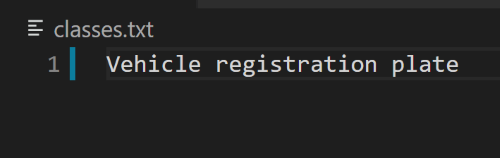

Example of classes.txt for multiclass object detector:

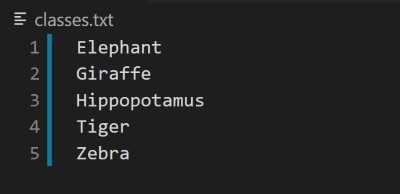

ここで、OIDv4_Toolkitが生成したラベルをYOLOv4ラベルに変換するために、次のコマンドを実行します（これは、訓練データセットと検証データセットの両方のラベルを変換する必要があります）。
```
python convert_annotations.py
```

これで、すべてのラベルがYOLOv4フォーマットに変換され、darknetがカスタムオブジェクト検出器を適切にトレーニングするために使用できるようになります。

trainフォルダとvalidationフォルダの中にある古い'Label'フォルダを削除してください。(ファイルパスは、ダウンロードしたクラスによって、'Vehicle registration plate'...の名前が異なります。
```
rm -r OID/Dataset/train/'Vehicle registration plate'/Label/...
```
そして最後に、検証用の古いラベルも削除します。
```
rm -r OID/Dataset/validation/'Vehicle registration plate'/Label/
```
もしこのコマンドが動作しない場合は、「Label」のあるフォルダに行き、右クリックして「Delete」を押し、手動で削除してください。

これで、画像と注釈が入っているフォルダは次のようになります。それぞれの画像の横（または下）には、同じ名前のテキストファイルがあるはずです。

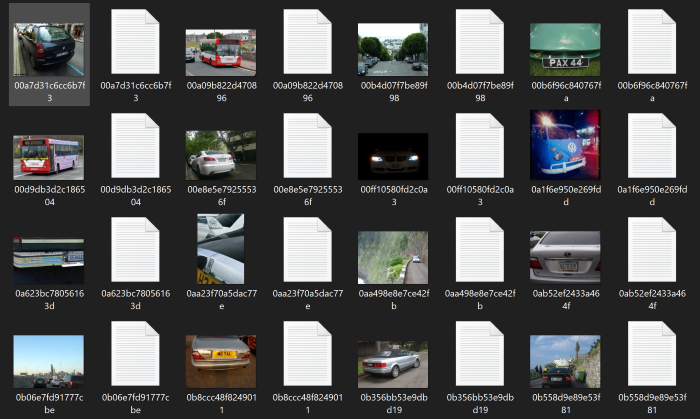

## You now have your Custom YOLOv4 Training and Validation Datasets with proper labels!

### 方法2：アノテーションツールを使って画像に手動でラベルを付ける
GoogleのOpen Images Datasetで適切な画像やクラスが見つからない場合は、アノテーションツールを使ってマニュアルでラベルを描く必要がありますが、これは面倒な作業です。

以前、YOLOv4用のカスタムデータセットを作成するために、Google Imagesから画像を一括ダウンロードする方法と、注釈ツールLabelImgを使用する方法を説明したビデオを作成しました。以下のリンクからご覧ください。

[Create Labels and Annotations for Custom YOLOv3 Dataset (Video)](https://www.youtube.com/watch?v=EGQyDla8JNU) **(same format for YOLOv4)**

チュートリアルビデオに従った後、画像やテキストファイルが入ったフォルダがトレーニングデータセットとして、また、上のような検証データセットとして用意されているはずです。

## You now have your Custom YOLOv4 Datasets!

# ステップ2：カスタムデータセットをクラウドVMに移動する
トレーニングと検証に使用するデータセットが適切にフォーマットされたので、これらのデータセットをクラウドVMに移動して、実際にモデルのトレーニングと検証を行う必要があります。

ローカルマシン上の画像やテキストファイルが入ったtraininデータセットのフォルダを「**obj**」という名前に変更し、「obj」フォルダの.zipフォルダを作成することをお勧めします。そして、そのzipをGoogleドライブにアップロードすることをお勧めします。これで、Googleドライブのどこかにobj.zipができるはずです。

検証用データセットも同じようにしますが、名前は「**test**」とします。これで、**test.zip**もGoogleドライブにアップロードされているはずです。

これで、データセットをクラウドのVMに転送する時間が **大幅に** 短縮されます。

あとはZIPをコピーして、クラウドVMで解凍します。

In [ ]:
# this is where my datasets are stored within my Google Drive (I created a yolov4 folder to store all important files for custom training) 
!ls /mydrive/yolov4

In [ ]:
# copy over both datasets into the root directory of the Colab VM (comment out test.zip if you are not using a validation dataset)
!cp /mydrive/yolov4/obj.zip ../
!cp /mydrive/yolov4/test.zip ../

In [ ]:
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

# ステップ3： トレーニング用ファイルの設定
このステップでは、カスタムの.cfg、obj.data、obj.names、train.txt、test.txtファイルを適切に設定します。

これらのファイルを設定する際には、タイプミスや小さなミスがあると、カスタムトレーニングに大きな問題が生じる可能性があるため、細心の注意を払うことが重要です。

## i) Cfgファイル
以下のセルを実行して、yolov4.cfgをGoogle Driveにコピーオーバーします。これで、テキストエディターで編集できるようになります。

In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov4-custom.cfg /mydrive/yolov4/yolov4-obj.cfg

In [ ]:
# to download to local machine (change its name to yolov4-obj.cfg once you download)
download('cfg/yolov4-custom.cfg')

ここで、オブジェクトディテクターに合わせて、.cfgを編集する必要があります。そのためには、コードエディタやテキストエディタで開きます。

cfgをgoogle driveにダウンロードした場合は、google driveに行ってyolov4-obj.cfgをダブルクリックし、**Open with**ドロップダウンをクリックして**Text Editor**を選択することで、内蔵の**Text Editor**を使用することができます。

**（画像は以前のチュートリアルのものなので、ファイル名が違っていても気にしないでください）**。


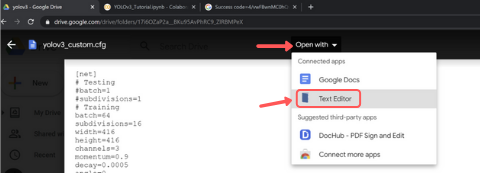

究極の結果を得るためには、**batch = 64**、**subdivisions = 16**にすることをお勧めします。問題が発生した場合は、subdivisionsを32に上げてください。

検出器をトレーニングするクラスの数に応じて、Cfgの残りの部分を変更してください。

**注：***。
私は、**max_batches = 6000**、**steps = 4800, 5400**、**classes = 1**を3つのYOLOレイヤーに、**filters = 18**をYOLOレイヤーの前の3つの畳み込みレイヤーに変更しました。

変数の設定方法。

width = 416

height = 416
**(these can be any multiple of 32, 416 is standard, you can sometimes improve results by making value larger like 608 but will slow down training)**

max_batches = (# of classes) * 2000
**(but no less than 6000 so if you are training for 1, 2, or 3 classes it will be 6000, however detector for 5 classes would have max_batches=10000)**

steps = (80% of max_batches), (90% of max_batches)
**(so if your max_batches = 10000, then steps = 8000, 9000)**

filters = (# of classes + 5) * 3
**(so if you are training for one class then your filters = 18, but if you are training for 4 classes then your filters = 27)**


**Optional:** If you run into memory issues or find the training taking a super long time. In each of the three yolo layers in the cfg, change one line from random = 1 to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if you run into any memory issues.


In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov4/yolov4-obj.cfg ./cfg

## ii) obj.namesとobj.data 
コードエディタやテキストエディタで新規ファイル **obj.names** を作成し、データセット生成ステップで作成した classes.txt と同じ順番で1行に1つのクラス名を記述します。

**注意：**クラス名にはスペースを入れないようにしてください。このため、私は「Vehicle Registration Plate」を「**license_plate**」に変更しました。

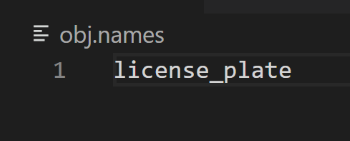

Example for multiclass obj.names file:

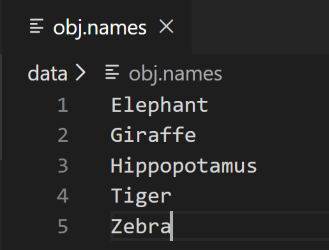

You will also create a **obj.data** file and fill it in like this (change your number of classes accordingly, as well as your backup location)

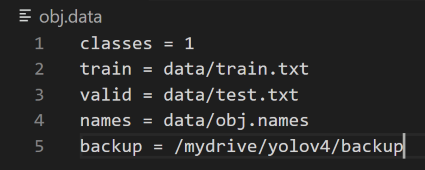

This backup path is where we will save the weights to of our model throughout training. Create a backup folder in your google drive and put its correct path in this file.

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4/obj.names ./data
!cp /mydrive/yolov4/obj.data  ./data

## iii) train.txtとtest.txtの生成
カスタム検出器の学習を開始する前に必要な最後の設定ファイルは，train.txtとtest.txtで，すべての学習画像と検証画像の相対パスが記述されています。

幸いなことに，私はこの2つのファイルを，すべての画像への適切なパスを含むように自動的に生成するスクリプトを作成しました．

このスクリプトは、[Github Repo](https://github.com/theAIGuysCode/YOLOv4-Cloud-Tutorial)からアクセスできます。

この2つのファイルをローカルマシンにダウンロードして、Google Driveにアップロードすれば、Colab Notebookで使用することができます。

In [ ]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
!cp /mydrive/yolov4/generate_train.py ./
!cp /mydrive/yolov4/generate_test.py ./

あとは、両方のスクリプトを実行するだけで、2つのtxtファイルを生成する作業が行われます。

In [ ]:
!python generate_train.py
!python generate_test.py

In [ ]:
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

ファイルの生成がうまくいったかどうか不安で、すべてが計画通りに進んだかどうかを再確認したい場合は、左側のファイルエクスプローラーで**train.txt**をダブルクリックすると、以下のように表示されます。

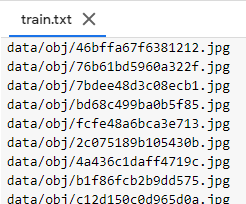

It will contain one line for each training image path.

# ステップ4： 畳み込み層用の事前学習済みの重みをダウンロードします。
このステップでは、YOLOv4ネットワークの畳み込み層用の重みをダウンロードします。これらのウェイトを使用することで、カスタムオブジェクト検出器の精度が格段に向上し、長時間のトレーニングが必要なくなります。これらのウェイトを使用する必要はありませんが、モデルの収束と精度の向上が早くなることを信じてください。ぜひ使ってみてください。

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

# ステップ5：カスタムオブジェクトディテクターのトレーニング
ついにこの時がやってきました。正念場を迎えたのです。これで、YOLOv4のカスタムオブジェクト検出器を、あなたが決めたクレイジーなクラスでトレーニングする準備が整いました。では、次のコマンドを実行してください。(-dont_showフラグは、Colab Notebookはその場で画像を開くことができないので、チャートを表示しないようにします。-mapフラグは、モデルの精度を見るために、チャートに平均平均精度を重ねます。)
```
!./darknet detector train <obj.dataへのパス> <カスタム設定へのパス> yolov4.conv.137 -dont_show -map
```
*TIP:** このトレーニングは、.cfgファイルで選択した反復回数に応じて数時間かかることがあります。このトレーニングは、.cfgファイルで選択した反復回数に応じて数時間かかります。しかし、Colab Cloud Serviceは、長時間（30～90分）アイドル状態が続くと、VMからキックしてしまいます。

これを回避するには、(CTRL + SHIFT + i)を同時に押して、ブラウザのインスペクタビューを開きます。

以下のコードをコンソールウィンドウに貼り付け、**Enter**を押します。
```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```
Looks like this, it will click the screen every 10 minutes so that you don't get kicked off for being idle! HACKS!

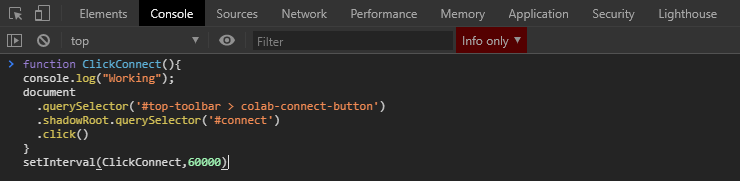

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map

トレーニング終了後、以下のコマンドを実行すると、トレーニングの過程でモデルがどのような結果になったかをグラフで確認することができます。これは、平均損失とイテレーションの関係を示しています。モデルが「正確」であるためには、損失が2以下になるようにする必要があります。

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

Here is what the chart.png should look like after an uninterrupted training! If 

*   リスト項目

*   リスト項目

*   リスト項目

*   リスト項目
*   リスト項目


*   リスト項目


*   リスト項目


*   リスト項目

you stop training or it crashes during training your chart will look like the above one but don't worry you can still check accuracy of your model in the next steps.

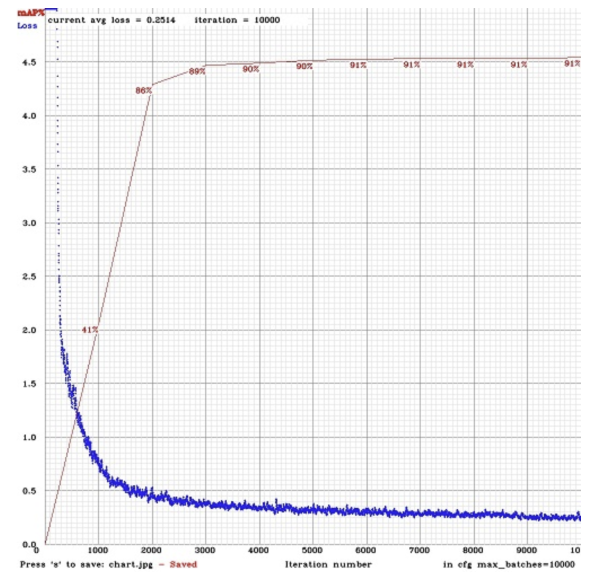

**TRICK**: トレーニング中に何らかの理由でエラーが発生したり、Colabがアイドル状態になっても、部分的にトレーニングされたモデルとウェイトは失われません。100回の繰り返しごとに、**yolov4-obj_last.weights**という重みファイルが**mydrive/yolov4/backup/**フォルダ（あなたのバックアップフォルダであればどこでも）に保存されます。これが、このフォルダをクラウドのVM上ではなく、Googleドライブに作成した理由です。ランタイムがクラッシュし、バックアップフォルダがクラウドVMにあった場合、ウェイトやトレーニングの進捗が失われます。

最後に保存したウエイトファイルからトレーニングを開始できるので、再起動する必要がありません。わーい 以下のコマンドを実行してください。ただし、バックアップの場所を指定してください。
```
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show
```

In [ ]:
# kick off training from where it last saved
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show

# ステップ6：モデルの平均平均精度（mAP）の確認
もし、'-map'フラグを追加してトレーニングを行わなかった場合でも、トレーニング後のモデルのmAPを確認することができます。トレーニングで保存したウェイトに対して以下のコマンドを実行すると、そのウェイトのファイルのmAP値が表示されます。保存した複数のウェイトで実行して比較し、最も高いmAPを持つウェイトを見つけることをお勧めします。

注：最終的なウェイトファイルがオーバーフィットしていると思われる場合は、これらのmAPコマンドを実行して、以前に保存したウェイトの1つがクラスに対してより正確なモデルであるかどうかを確認することが重要です。

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_1000.weights

# ステップ7：カスタムオブジェクト検出器の実行
遂に完成しました。これで、あなた独自の検出を行うためのカスタムオブジェクト検出器ができました。さあ、テストして楽しんでください。

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-obj.cfg
%cd ..

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights /mydrive/images/car2.jpg -thresh 0.3
imShow('predictions.jpg')

# Thanks!
Thanks for following along this tutorial, I hope it worked well for all of you!

If you enjoy YOLOv3 or YOLOv4 check out my other videos and subscribe to my channel so you don't miss out on any other amazing YOLO content! 

[The AI Guy](https://www.youtube.com/channel/UCrydcKaojc44XnuXrfhlV8Q)